In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

#### signal setup
##### f_fund = 2.5M, f_spur = 1.1M

i_rms = 2.04, q_rms = 2.04, y_rms = 5.05


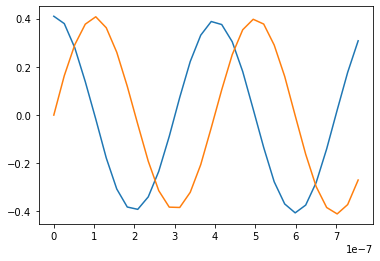

In [2]:
fs = 38.4e6
t = np.arange(0,16384) / fs
f1 = 2.5e6
f2 = 1.1e6
a1 = 0.4
a2 = 0.01
complex_flag = 1
noise_ratio = 0.003 / np.sqrt(2)
noise = np.random.normal(0,1,t.size) * noise_ratio
signal_i = a1*np.cos(2*np.pi*f1*t)
signal_q = a1*np.sin(2*np.pi*f1*t)
blk_i = a2*np.cos(2*np.pi*f2*t)
blk_q = a2*np.sin(2*np.pi*f2*t)
i = signal_i + blk_i + noise
q = signal_q + blk_q + noise
signal_y = signal_i + 1j * signal_q
blk_y = blk_i + 1j * blk_q
y = i + 1j * q
i_rms = 10*np.log10(np.square(np.std(signal_i))/50*1000)
q_rms = 10*np.log10(np.square(np.std(signal_q))/50*1000)
y_rms = 10*np.log10(np.square(np.std(signal_y))/50*1000)
print(f'{i_rms = :0.2f}, {q_rms = :0.2f}, {y_rms = :0.2f}')
plt.plot(t[0:30],i[0:30])
plt.plot(t[0:30],q[0:30])
# plt.plot(t[0:30],np.abs(y[0:30]))


#### FFT analysis

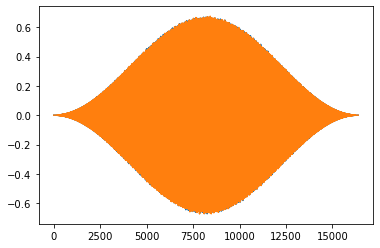

In [8]:
w = np.hanning(i.size)
# w = np.kaiser(i.size,beta=38)
w = w / np.sqrt(np.mean(np.square(w)))
if complex_flag:
    y_w = y*w
else:
    i_w = i*w
    q_w = q*w
plt.plot(i_w)
plt.plot(q_w)

yf max = 0.30383563064669444


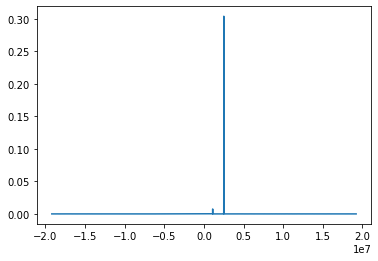

In [9]:
if complex_flag:
    shiftAmount = int((y.size-1)/2)
    freq = np.arange(-shiftAmount,-shiftAmount+y.size) * fs /y.size
    # freq = freq[0:int((y.size-1)/2)+1]
    yf = np.fft.fft(y_w) / y.size
    yf_mag = np.abs(np.roll(yf,shiftAmount))
    yf_db = 20*np.log10(yf_mag)
    print(f'yf max = {np.max(yf_mag)}')
    plt.plot(freq,yf_mag)
else:
    shiftAmount = int((i.size-1)/2)+1
    freq = np.arange(0,shiftAmount) * fs /i.size
    # freq = freq[0:int((y.size-1)/2)+1]
    i_f = np.fft.fft(i_w) / i.size
    q_f = np.fft.fft(q_w) / i.size
    if_mag = 2*np.abs(i_f[0:shiftAmount])
    qf_mag = 2*np.abs(q_f[0:shiftAmount])
    if_db = 20*np.log10(if_mag)
    qf_db = 20*np.log10(qf_mag)
    print(f'i_f max = {np.max(if_mag)}')
    print(f'q_f max = {np.max(qf_mag)}')
    plt.subplot(211)
    plt.plot(freq,if_mag)
    plt.subplot(212)
    plt.plot(freq,qf_mag)

yf_db max = -10.35, dbv to dbm ratio = -15.40


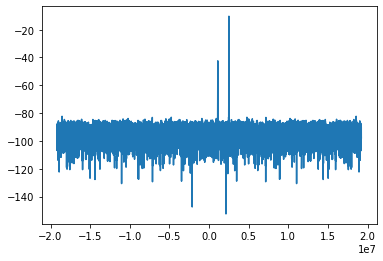

In [10]:
if complex_flag:
    plt.plot(freq,yf_db)
    print(f'yf_db max = {np.max(yf_db):0.2f}, dbv to dbm ratio = {np.max(yf_db)-y_rms:0.2f}')
else:
    plt.subplot(211)
    plt.plot(freq,if_db)
    plt.subplot(212)
    plt.plot(freq,qf_db)
    print(f'if_db max = {np.max(if_db):0.2f}')
    print(f'qf_db max = {np.max(if_db):0.2f}') 
    print(f'dbv to dbm ratio = {np.max(if_db)-i_rms:0.2f}')
    print(f'dbv to dbm ratio = {np.max(qf_db)-q_rms:0.2f}')

#### autocorrelaton

11


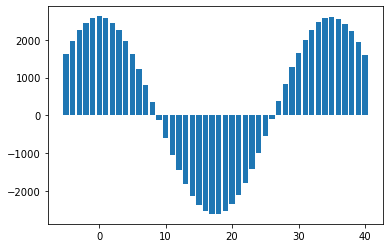

In [15]:
if True:
    res = []
    for index in range(-5,41,1):
        res.append([index,np.max(scipy.signal.correlate(y,np.roll(y,index),'valid'))])
    res = np.array(res)
    print(res.argmax())
    plt.bar(res[:,0],res[:,1])


#### single point fft

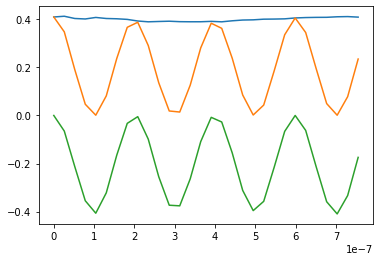

In [11]:
freq_offset = 2.5e6
i_ref = np.cos(2*np.pi*freq_offset*t)
q_ref = -1*np.sin(2*np.pi*freq_offset*t)
c_ref = i_ref + 1j* q_ref
new_sig_c = y * c_ref
plt.plot(t[0:30],np.abs(new_sig_c[0:30]))
new_sig_i = i * i_ref
new_sig_q = q * q_ref
plt.plot(t[0:30],new_sig_i[0:30])
plt.plot(t[0:30],new_sig_q[0:30])
# new_sig_i = y * i_ref 
# new_sig_q = y * q_ref 
# new_sig_c = new_sig_i + new_sig_q

# plt.plot(t[0:30],new_sig_i[0:30])
# plt.plot(t[0:30],new_sig_q[0:30])


-9.720197915980433
y_peak = 0.4000731351652157
energy is 5.051600171859601


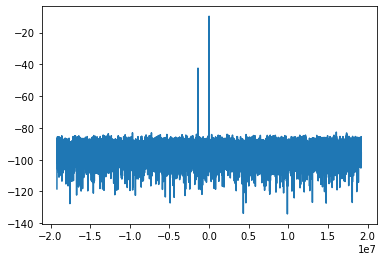

In [14]:
new_sig_c_w = new_sig_c * w
new_sig_cf = np.fft.fft(new_sig_c_w) / y.size
new_sig_cf_mag = np.abs(np.roll(new_sig_cf,shiftAmount))
new_sig_cf_db = 20*np.log10(new_sig_cf_mag)
print(new_sig_cf_db.max())
print(f'y_peak = {np.mean(np.abs(new_sig_c))}')
print(f'energy is {10*np.log10(np.square(np.abs(np.mean(new_sig_c)))/50*1000)}')
plt.plot(freq,new_sig_cf_db)

# new_sig_i_w = new_sig_i * w
# new_sig_q_w = new_sig_q * w
# new_sig_if = np.fft.fft(new_sig_i_w) / i.size
# new_sig_qf = np.fft.fft(new_sig_q_w) / q.size
# new_sig_if_mag = 2*np.abs(new_sig_if[0:shiftAmount])
# new_sig_qf_mag = 2*np.abs(new_sig_qf[0:shiftAmount])
# new_sig_if_db = 20*np.log10(new_sig_if_mag)
# new_sig_qf_db = 20*np.log10(new_sig_qf_mag)
# print(new_sig_if_db.max())
# print(new_sig_qf_db.max())
# print(f'i_peak = {np.mean(new_sig_i)}, q_peak = {np.mean(new_sig_q)}')
# print(f'i energy is {10*np.log10(np.square(np.mean(new_sig_i*2)/np.sqrt(2))/50*1000)}')
# print(f'q energy is {10*np.log10(np.square(np.mean(new_sig_q*2)/np.sqrt(2))/50*1000)}')
# plt.subplot(211)
# plt.plot(freq,new_sig_if_db)
# plt.subplot(212)
# plt.plot(freq,new_sig_qf_db)

## sinc analysis

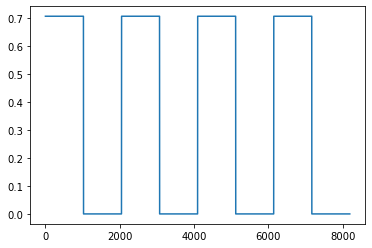

In [28]:
t_sinc = np.arange(0,8192) / fs
sinc_amp = 1/np.sqrt(2)
i_sinc = sinc_amp * np.array([1 if (int(ele/1024)%2)==0 else 0 for ele in range(8192)])
plt.plot(i_sinc)

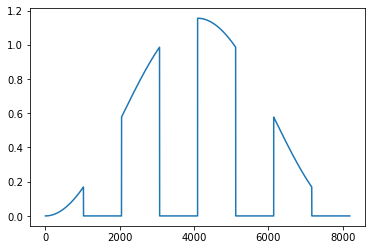

In [49]:
windowing = 1
if windowing:
    w_sinc = np.hanning(t_sinc.size)
    w_sinc = w_sinc / np.sqrt(np.mean(np.square(w_sinc)))
    y_w_sinc = i_sinc * w_sinc 
else:
    y_w_sinc = i_sinc
plt.plot(y_w_sinc)

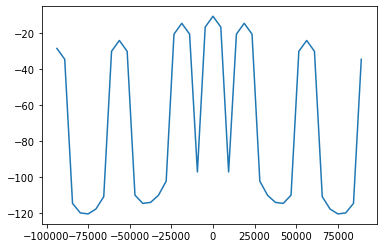

In [50]:
y_f_sinc = np.fft.fft(y_w_sinc) / t_sinc.size
shiftAmount_sinc = int((t_sinc.size-1)/2)+1
freq_sinc = np.arange(-shiftAmount_sinc,-shiftAmount_sinc+t_sinc.size) * fs /t_sinc.size
y_f_sinc_amp = np.abs(np.roll(y_f_sinc,shiftAmount_sinc))
y_f_sinc_db = np.array([20*np.log10(ele) if ele > 0 else -100 for ele in y_f_sinc_amp])
# plt.subplot(121)
window = 20
# plt.plot(freq_sinc[shiftAmount_sinc-window:shiftAmount_sinc+window], y_f_sinc_amp[shiftAmount_sinc-window:shiftAmount_sinc+window])
plt.plot(freq_sinc[shiftAmount_sinc-window:shiftAmount_sinc+window], y_f_sinc_db[shiftAmount_sinc-window:shiftAmount_sinc+window])

# plt.subplot(122)
# plt.plot(freq_sinc, y_f_sinc_db)